In [55]:
import sys
sys.path.append('../src')

import torch
import numpy as np
import pandas as pd
import librosa as lr
import seaborn as sns
import librosa.display as lrd
import matplotlib.pyplot as plt

from src.dataset import NsynthDataset
from src.utils import get_preprocessing, get_dataloader

# Test dataset

In [44]:
sr = 16000
duration = 4

In [59]:
preproc_train = get_preprocessing(train=True)
ds_train = NsynthDataset('/home/rmiccini/stanford_mir2/data/nsynth-train', sr=sr, duration=duration, pitches=[60], transform=preproc_train)
sample, labels = ds_train[0]

In [60]:
sample.shape

torch.Size([80, 251])

In [61]:
labels

{'note': 55602,
 'sample_rate': 16000,
 'pitch': 60,
 'instrument_source': 0,
 'instrument_family_str': 'brass',
 'instrument_str': 'brass_acoustic_009',
 'note_str': 'brass_acoustic_009-060-100',
 'instrument_source_str': 'acoustic',
 'velocity': 100,
 'instrument_family': 1,
 'instrument': 88,
 'qualities': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]}

In [73]:
classes = ds_train.df['instrument_source_str'].str.cat(ds_train.df['instrument_family_str'], sep=' ').unique()
n_classes = len(classes)
n_classes, classes

(28,
 array(['acoustic brass', 'electronic keyboard', 'acoustic mallet',
        'synthetic bass', 'electronic organ', 'acoustic guitar',
        'acoustic string', 'electronic guitar', 'electronic bass',
        'acoustic reed', 'synthetic vocal', 'electronic mallet',
        'acoustic flute', 'electronic string', 'acoustic keyboard',
        'synthetic guitar', 'acoustic bass', 'acoustic vocal',
        'electronic vocal', 'synthetic synth_lead', 'acoustic organ',
        'synthetic keyboard', 'synthetic mallet', 'synthetic reed',
        'synthetic flute', 'electronic reed', 'electronic brass',
        'electronic flute'], dtype=object))

# Test dataloader

In [48]:
dl_train = get_dataloader(ds_train, batch_size=16)
sample_batch, labels_batch = next(iter(dl_train))

In [49]:
sample_batch.shape

torch.Size([16, 80, 251])

In [50]:
labels_batch = {k: (v if isinstance(v, list) else v.tolist()) for k, v in labels_batch.items() if k != 'qualities'}
pd.DataFrame(labels_batch)

,note_str,sample_rate,instrument_source,instrument_family_str,instrument_family,note,instrument_source_str,pitch,instrument_str,instrument,velocity
0,keyboard_acoustic_004-060-025,16000,0,keyboard,4,278915,acoustic,60,keyboard_acoustic_004,327,25
1,bass_synthetic_098-060-100,16000,2,bass,0,194814,synthetic,60,bass_synthetic_098,803,100
2,reed_acoustic_011-060-100,16000,0,reed,7,108,acoustic,60,reed_acoustic_011,104,100
3,bass_electronic_027-060-127,16000,1,bass,0,240911,electronic,60,bass_electronic_027,880,127
4,bass_synthetic_033-060-050,16000,2,bass,0,207339,synthetic,60,bass_synthetic_033,417,50
5,reed_acoustic_018-060-100,16000,0,reed,7,53540,acoustic,60,reed_acoustic_018,183,100
6,string_acoustic_056-060-050,16000,0,string,8,104395,acoustic,60,string_acoustic_056,436,50
7,brass_acoustic_015-060-050,16000,0,brass,1,62983,acoustic,60,brass_acoustic_015,121,50
8,organ_electronic_028-060-127,16000,1,organ,6,205479,electronic,60,organ_electronic_028,440,127
9,mallet_acoustic_062-060-075,16000,0,mallet,5,121756,acoustic,60,mallet_acoustic_062,644,75


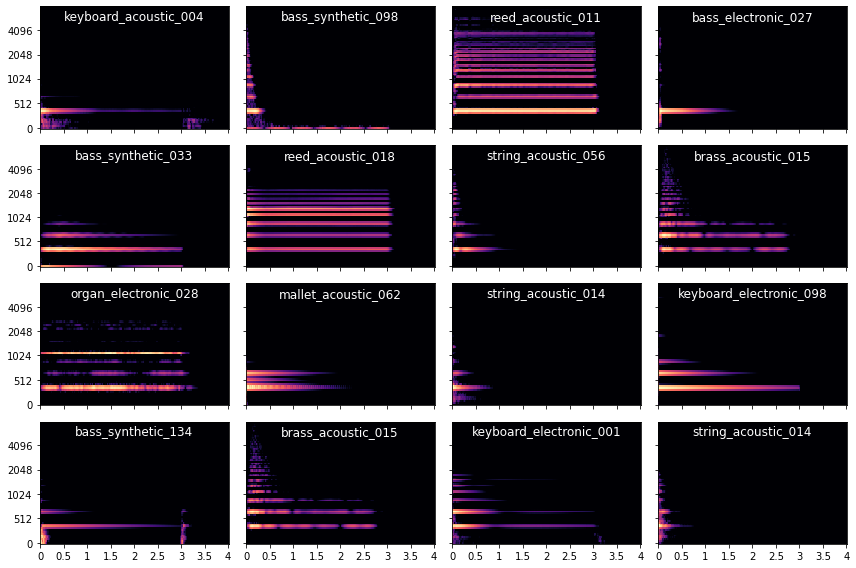

In [54]:
fig, axs = plt.subplots(4, 4, figsize=(12, 8), sharex='col', sharey='row')

for x, title, ax in zip(sample_batch, labels_batch['instrument_str'], axs.flatten()):
    y = lr.amplitude_to_db(np.abs(x.numpy()), ref=1)
    lrd.specshow(y, ax=ax, cmap='magma', sr=sr, win_length=1024, hop_length=256, x_axis='s', y_axis='mel')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title, y=1.0, pad=-14, color='w')
fig.tight_layout()
plt.show()

# Convert mel spec to audio